CG MSM from "primitive clustering" along rama-plot
====

In [1]:
import pyemma
pyemma.__version__

'2.1.1'

In [2]:
import os
%pylab inline
matplotlib.rcParams.update({'font.size': 12})

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import msmbuilder
from msmbuilder.msm.ratematrix import ContinuousTimeMSM
import scipy
from msmtools.analysis.dense.decomposition import eigenvectors, eigenvalues
import operator
from scipy.optimize import curve_fit

Get the pops
------

In [4]:
Rvals = np.arange(2,17,2)
Nmss = 5

pop_sort = []
for mss in range(Nmss):
    pop_sort.append([])
    for R in range(len(Rvals)):
        pop = np.genfromtxt('data_wtd_lag-'+str(Rvals[R])+'/wtd_'+str(mss))
        pop_sort[mss].append( pop[:,1] )
    pop_sort[mss] = np.array(pop_sort[mss])

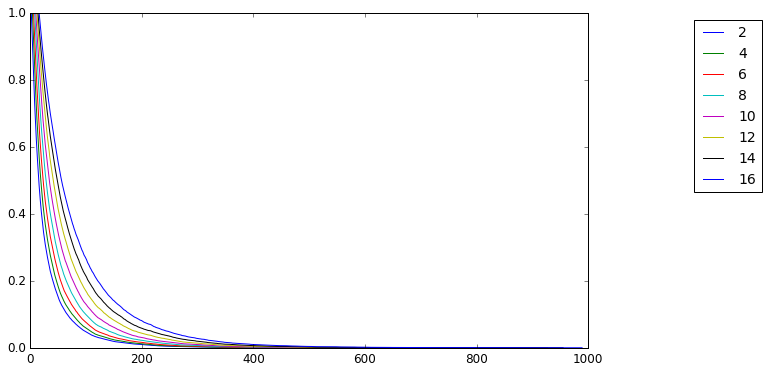

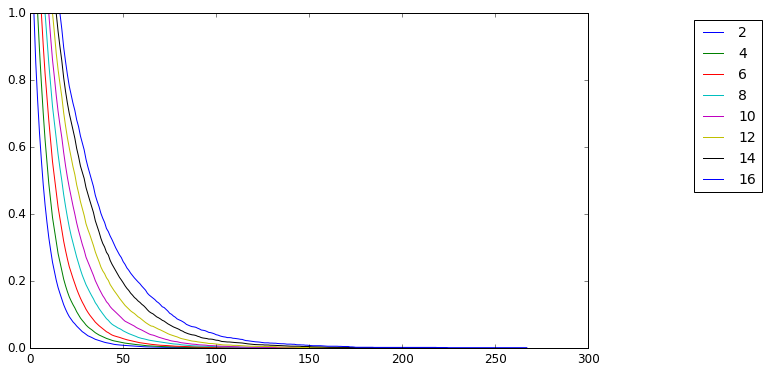

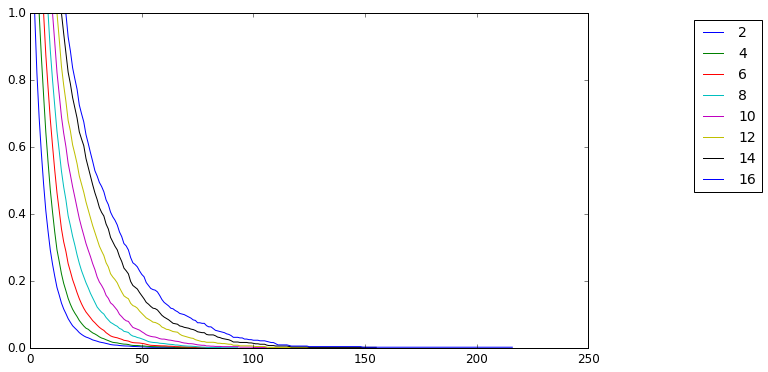

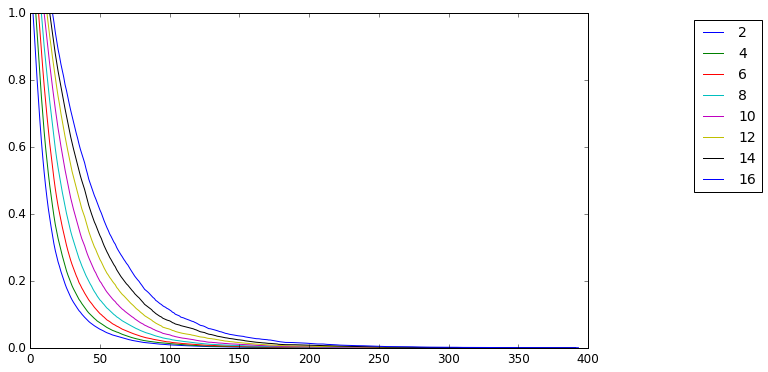

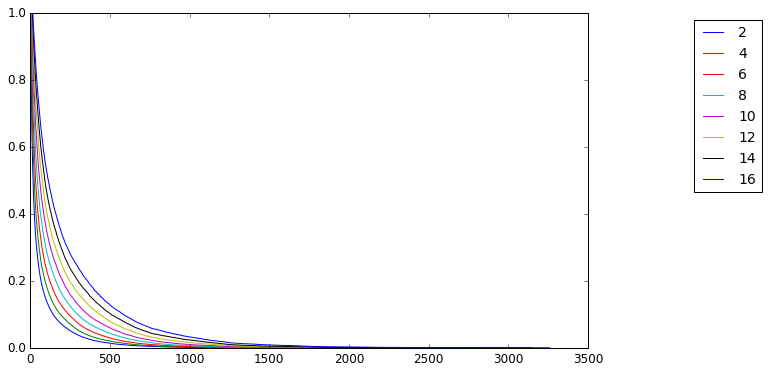

In [5]:
for mss in range(Nmss):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    for i in range(len(Rvals)):
        label=str(Rvals[i])
        plt.plot(pop_sort[mss][i],label=label)
    legend = plt.legend(fontsize='14',loc='upper center', bbox_to_anchor=(1.25, 1))
    plt.show()
# plt.xlim([0,10000])
# plt.ylim([0.,0.2])

In [6]:
len(pop_sort[mss][i])

3261

In [7]:
def exp_func(x, a, c, d):
    return a*np.exp(-c*x)+d

In [8]:
x_val = []
y_val = []
p0 = (1, 1, 1)
y_opt = []
y_cov = []
for mss in range(Nmss):
    x_val.append([])
    y_val.append([])
    y_opt.append([])
    y_cov.append([])
    for i in range(len(Rvals)):
        x_val[mss].append( np.arange(len(pop_sort[mss][i]))/100. )
        y_val[mss].append( (pop_sort[mss][i]/pop_sort[mss][i][0]) )
        tmp_opt, tmp_cov = curve_fit(exp_func, x_val[mss][i], y_val[mss][i])
        y_opt[mss].append( tmp_opt )
        y_cov[mss].append( tmp_cov )

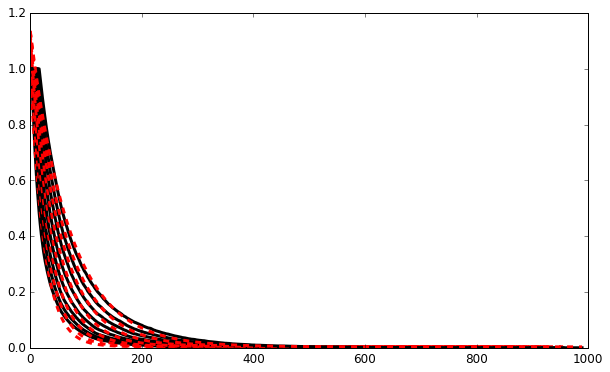

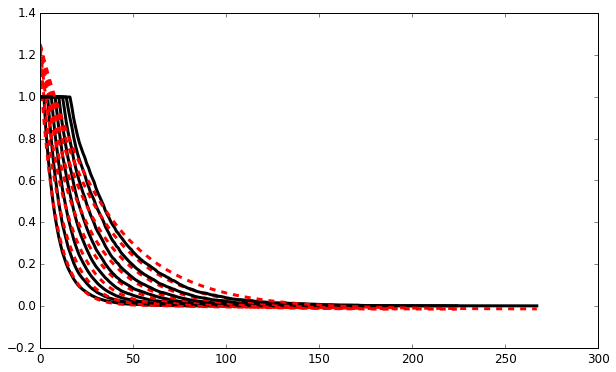

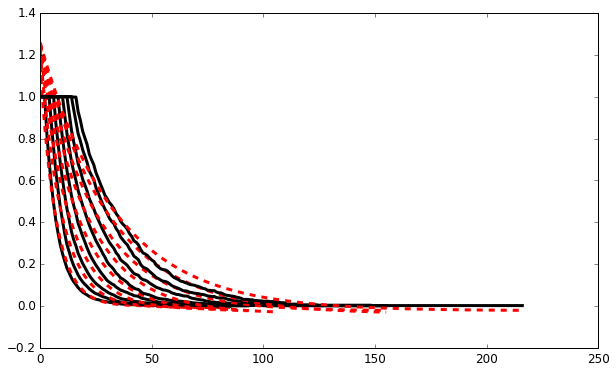

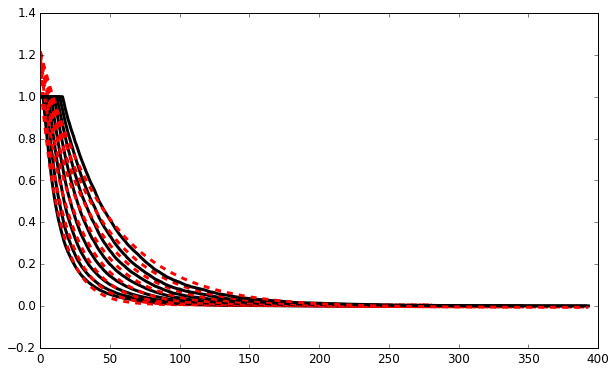

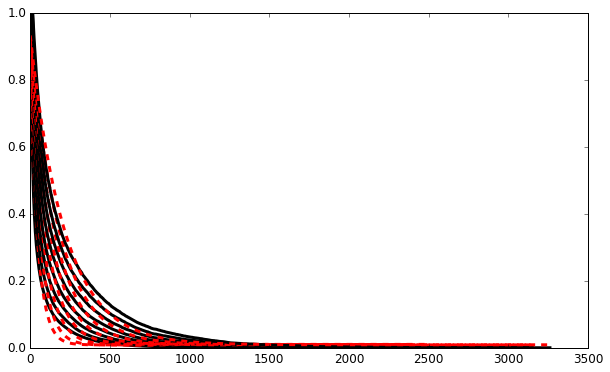

In [9]:
y_opt_vals = []
cut = 20000
for mss in range(Nmss):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    y_opt_vals.append([])
    for i in range(0,len(Rvals)):
        label=str(Rvals[i])
        y_opt_vals[mss].append( exp_func( x_val[mss][i], y_opt[mss][i][0], y_opt[mss][i][1], y_opt[mss][i][2] ) )
        plt.plot(y_val[mss][i][:cut],label=label,linewidth=3, color='k')
        plt.plot( y_opt_vals[mss][i][:cut],label=label, linewidth=3, linestyle='--', color='r' )
    #plt.legend()
    #legend = plt.legend(fontsize='20',loc='upper center', bbox_to_anchor=(1.25, 1))
    
    # frame = legend.get_frame()
    # frame.set_linewidth('2.0')
    # ltext = legend.get_texts()
    # plt.setp(ltext, fontweight='bold')
    #plt.xlim([-200,25000])
    #plt.ylim([0,1.0])
    plt.show()

In [10]:
for mss in range(Nmss):
    y_val[mss] = np.array(y_val[mss])
    y_opt_vals[mss] = np.array(y_opt_vals[mss])

In [11]:
(y_val[mss][i]-y_opt_vals[mss][i])**2

array([  4.50409763e-03,   5.09313538e-03,   5.71539851e-03, ...,
         7.87161107e-05,   7.87160884e-05,   7.87160662e-05])

In [12]:
rsq = []
for mss in range(Nmss):
    rsq.append([])
    ss_res_tmp = 0
    ss_tot_tmp = 0
    for i in range(0,len(Rvals)):
        ss_res_tmp += np.sum( (y_val[mss][i][:cut]-y_opt_vals[mss][i][:cut])**2 )
        ss_tot_tmp += np.sum( (y_val[mss][i][:cut])**2 )
        #ss_tot_tmp += np.sum( (y_val[mss][i][:cut] - np.mean(y_val[mss][i][:cut]))**2 )
        #rsq[mss].append( 1. - ss_res_tmp/ss_tot_tmp )
        rsq[mss].append( ss_res_tmp/ss_tot_tmp )

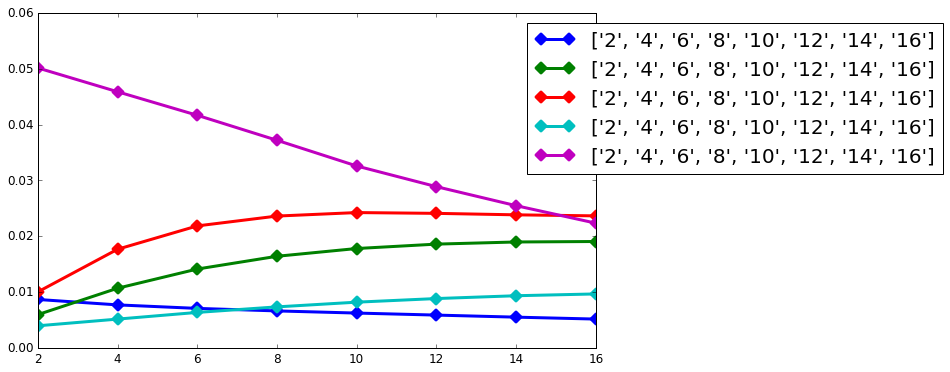

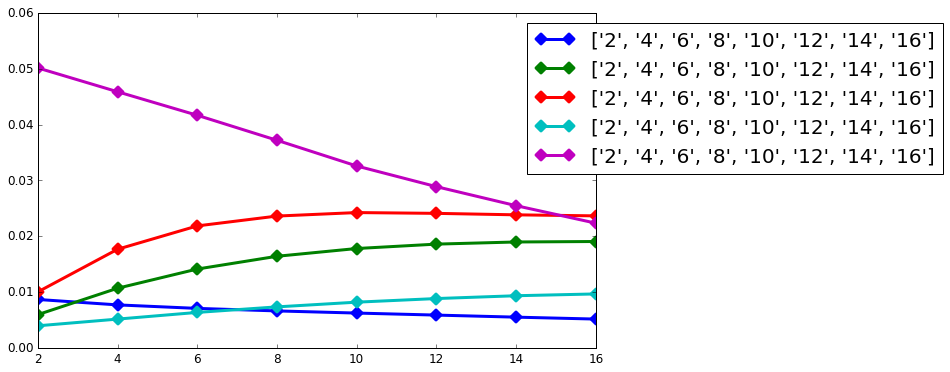

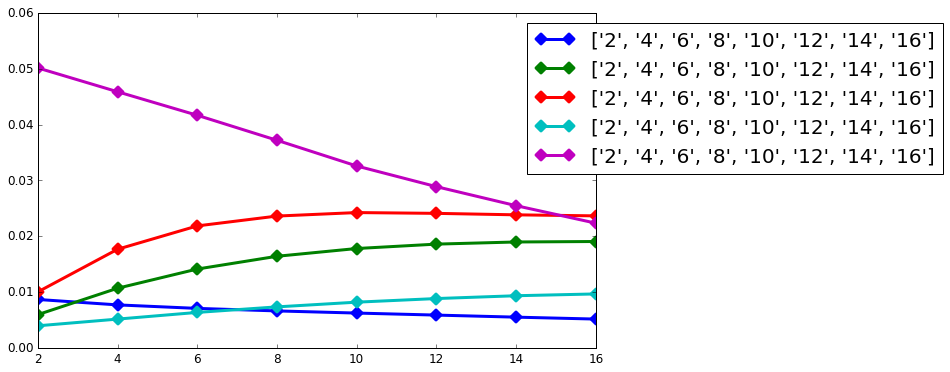

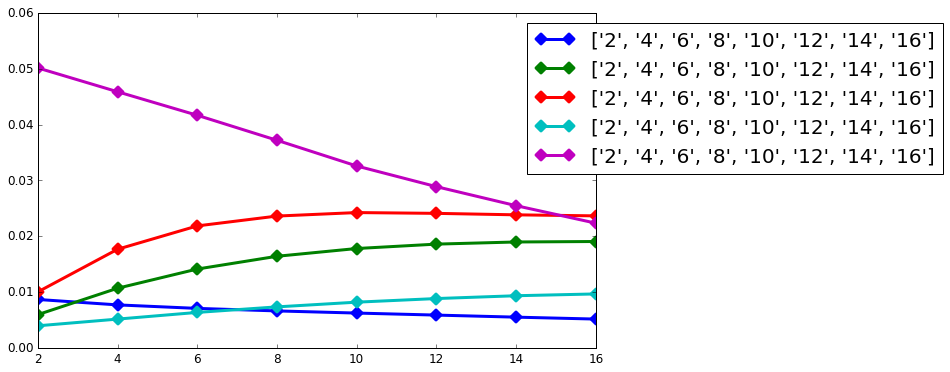

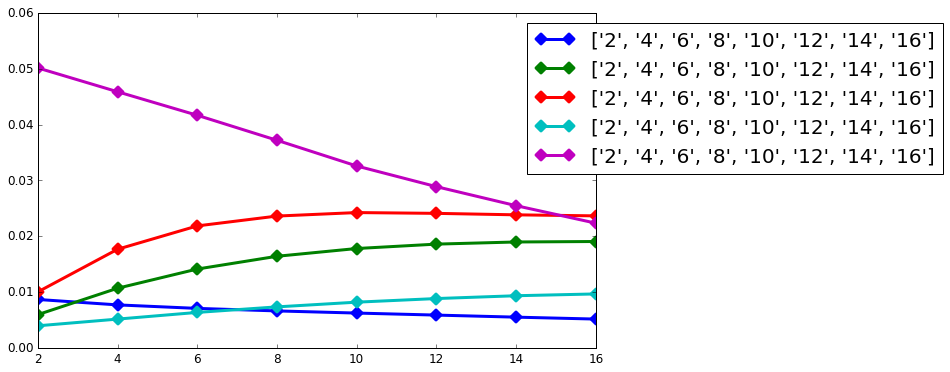

In [13]:
for mss in range(Nmss):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    labels = []
    for i in range(0,len(Rvals)):
        labels.append(str(Rvals[i]))
    plt.plot(Rvals,np.array(rsq).T,linewidth=3,marker='x',mew=10,label=labels)
    #plt.xticks(np.arange(len(rsq)),labels)
    plt.legend()
    legend = plt.legend(fontsize='20',loc='upper center', bbox_to_anchor=(1.25, 1))
# frame = legend.get_frame()
# frame.set_linewidth('2.0')
# ltext = legend.get_texts()
# plt.setp(ltext, fontweight='bold')
#plt.xlim([-200,25000])
#plt.ylim([0,1.0])